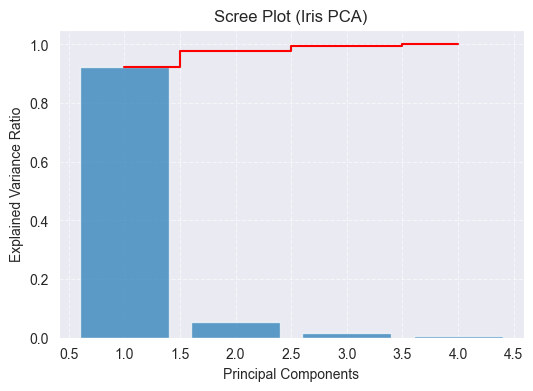

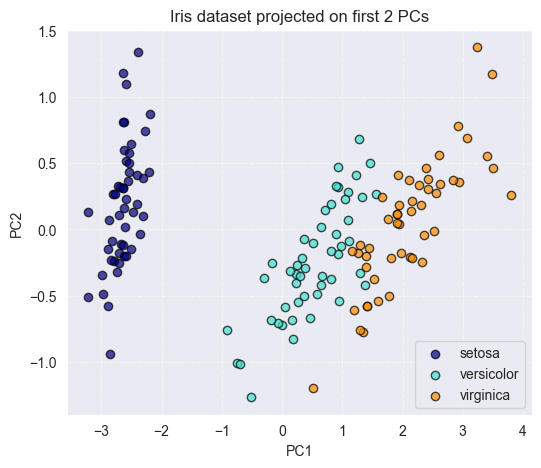

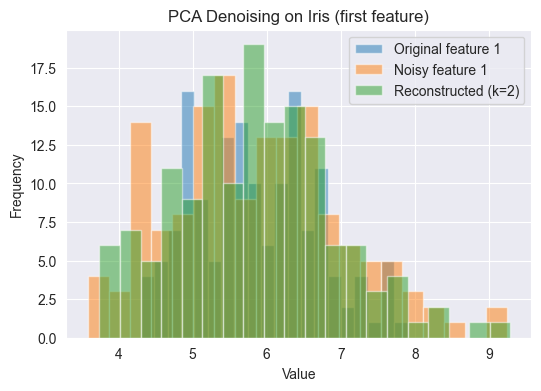

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Center data and compute PCA
pca = PCA(n_components=4)
X_r = pca.fit_transform(X)

# 1. Scree plot (explained variance ratio)
plt.figure(figsize=(6,4))
plt.bar(range(1, 5), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.step(range(1, 5), np.cumsum(pca.explained_variance_ratio_), where='mid', color='red')
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot (Iris PCA)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# 2. Scatter plot of first 2 PCs
plt.figure(figsize=(6,5))
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], alpha=.7, color=color,
                label=target_name, edgecolors="k")
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Iris dataset projected on first 2 PCs")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# 3. Denoising demo with PCA
np.random.seed(42)
sigma = 0.8
X_noisy = X + np.random.normal(0, sigma, X.shape)

pca_denoise = PCA(n_components=2)
X_reduced = pca_denoise.fit_transform(X_noisy)
X_reconstructed = pca_denoise.inverse_transform(X_reduced)

# Compare first feature distributions
plt.figure(figsize=(6,4))
plt.hist(X[:,0], bins=20, alpha=0.5, label="Original feature 1")
plt.hist(X_noisy[:,0], bins=20, alpha=0.5, label="Noisy feature 1")
plt.hist(X_reconstructed[:,0], bins=20, alpha=0.5, label="Reconstructed (k=2)")
plt.legend()
plt.title("PCA Denoising on Iris (first feature)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
